In [1]:
%load_ext autoreload
%autoreload 2

import logging
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint
import defi.dao_cross.supply_demand as ddcrsede
import defi.dao_cross.order as ddacrord

In [2]:
try:
    import pulp
except ImportError:
    !sudo /bin/bash -c "(source /venv/bin/activate; pip install pulp)"
    import pulp
import defi.dao_cross.optimize as ddacropt

In [3]:
hdbg.init_logger(verbosity=logging.DEBUG)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-e0766704-ba82-43b1-9099-26247b43128f.json'
DEBUG Effective logging level=10
DEBUG Shut up 28 modules: matplotlib.ticker, matplotlib, matplotlib.mathtext, matplotlib.style, matplotlib.dates, matplotlib.axes._base, matplotlib._afm, matplotlib.texmanager, matplotlib.category, matplotlib.gridspec, matplotlib.backend_bases, matplotlib.axes._axes, matplotlib.colorbar, matplotlib.font_manager, matplotlib.axes, matplotlib._constrained_layout, matplotlib.dviread, asyncio, matplotlib.lines, matplotlib.figure, matplotlib.style.core, matplotlib.artist, matplotlib.axis, matplotlib.image, matplotlib.text, matplotlib._layoutgrid, matplotlib.pyplot, matplotlib.textpath
DEBUG > (cd . && cd "$(git rev-parse --show-toplevel)/.." && (git rev-parse --is-inside-work-tree | grep -q true)) 2>&1
DEBUG > (git rev-parse --show-toplevel) 2>&1
-----------------------------------------------------------

# Pathological cases

## Get orders and set prices.

In [4]:
discrete_supply_curve = pd.Series(
    index=[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0],
    data=[1.5, 1.5, 2.0, 2.0, 3.0, 3.0, 3.5, 3.5, 4.375],
    name="supply",
)
discrete_supply_curve

0.0    1.500
1.0    1.500
1.0    2.000
2.0    2.000
2.0    3.000
3.0    3.000
3.0    3.500
4.0    3.500
4.0    4.375
Name: supply, dtype: float64

In [5]:
supply_orders1 = ddcrsede.convert_discrete_curve_to_limit_orders(discrete_supply_curve)
supply_orders_df1 = ddacrord.convert_orders_to_dataframe(supply_orders1)
supply_orders_df1

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address
0,2023-05-04 09:03:23.997474+00:00,sell,1,BTC,1.5,ETH,2
1,2023-05-04 09:03:23.997558+00:00,sell,1,BTC,2.0,ETH,1
2,2023-05-04 09:03:23.997570+00:00,sell,1,BTC,3.0,ETH,5
3,2023-05-04 09:03:23.997579+00:00,sell,1,BTC,3.5,ETH,4


In [6]:
discrete_demand_curve = pd.Series(
    index=[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0],
    data=[3.5, 3.5, 2.5, 2.5, 2.0, 2.0, 1.5, 1.5, 0.0],
    name="demand",
)
discrete_demand_curve

0.0    3.5
1.0    3.5
1.0    2.5
2.0    2.5
2.0    2.0
3.0    2.0
3.0    1.5
4.0    1.5
4.0    0.0
Name: demand, dtype: float64

In [7]:
demand_orders1 = ddcrsede.convert_discrete_curve_to_limit_orders(discrete_demand_curve)
demand_orders_df1 = ddacrord.convert_orders_to_dataframe(demand_orders1)
demand_orders_df1

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address
0,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2
1,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1
2,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5
3,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4


In [8]:
prices = {"BTC": 1, "ETH": 2}

## Multiple intersection points at quantity Q'

In [9]:
type_ = "supply"
supply_curve1 = ddcrsede.get_supply_demand_discrete_curve(type_, supply_orders_df1)
supply_curve1

0    1.500
1    1.500
1    2.000
2    2.000
2    3.000
3    3.000
3    3.500
4    3.500
4    4.375
Name: supply, dtype: float64

In [10]:
type_ = "demand"
demand_curve1 = ddcrsede.get_supply_demand_discrete_curve(type_, demand_orders_df1)
demand_curve1

0    3.5
1    3.5
1    2.5
2    2.5
2    2.0
3    2.0
3    1.5
4    1.5
4    0.0
Name: demand, dtype: float64

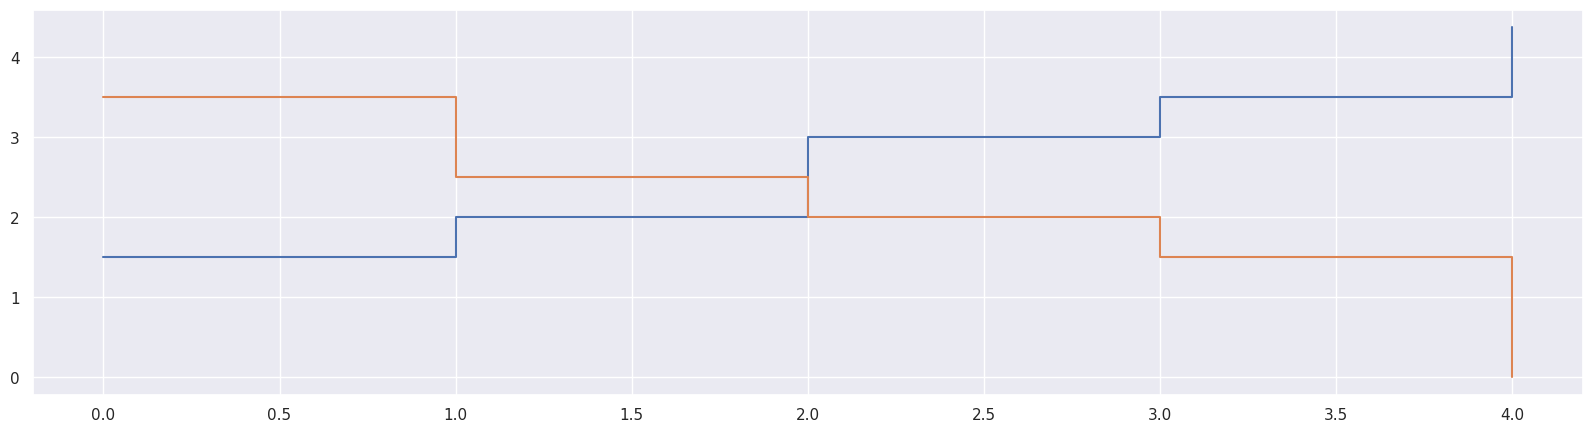

In [11]:
plt.plot(supply_curve1)
plt.plot(demand_curve1)
plt.show()

In [12]:
all_orders1 = supply_orders1 + demand_orders1
daocross_results1 = ddacropt.run_daocross_solver(all_orders1, prices)
display(daocross_results1)

DEBUG orders=[timestamp=2023-05-04 09:03:23.997474+00:00 action=sell quantity=1.0 base_token=BTC limit_price=1.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:23.997558+00:00 action=sell quantity=1.0 base_token=BTC limit_price=2.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:23.997570+00:00 action=sell quantity=1.0 base_token=BTC limit_price=3.0 quote_token=ETH deposit_address=5 wallet_address=5, timestamp=2023-05-04 09:03:23.997579+00:00 action=sell quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=4 wallet_address=4, timestamp=2023-05-04 09:03:24.073046+00:00 action=buy quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.073102+00:00 action=buy quantity=1.0 base_token=BTC limit_price=2.5 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.073112+00:00 action=buy quantity=1.0 base_token=BTC 

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-05-04 09:03:23.997474+00:00,sell,1,BTC,1.5,ETH,2,1.0,2.0,2.0
1,2023-05-04 09:03:23.997558+00:00,sell,1,BTC,2.0,ETH,1,1.0,2.0,2.0
2,2023-05-04 09:03:23.997570+00:00,sell,1,BTC,3.0,ETH,5,0.0,0.0,NaN
3,2023-05-04 09:03:23.997579+00:00,sell,1,BTC,3.5,ETH,4,0.0,0.0,NaN
4,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2,1.0,2.0,2.0
5,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1,1.0,2.0,2.0
6,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5,0.0,0.0,NaN
7,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4,0.0,0.0,NaN


In [13]:
daoswap_results1 = ddacropt.run_daoswap_solver(all_orders1)
display(daoswap_results1)

DEBUG orders=[timestamp=2023-05-04 09:03:23.997474+00:00 action=sell quantity=1.0 base_token=BTC limit_price=1.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:23.997558+00:00 action=sell quantity=1.0 base_token=BTC limit_price=2.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:23.997570+00:00 action=sell quantity=1.0 base_token=BTC limit_price=3.0 quote_token=ETH deposit_address=5 wallet_address=5, timestamp=2023-05-04 09:03:23.997579+00:00 action=sell quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=4 wallet_address=4, timestamp=2023-05-04 09:03:24.073046+00:00 action=buy quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.073102+00:00 action=buy quantity=1.0 base_token=BTC limit_price=2.5 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.073112+00:00 action=buy quantity=1.0 base_token=BTC 

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-05-04 09:03:23.997474+00:00,sell,1,BTC,1.5,ETH,2,1.00,1.500,1.5
1,2023-05-04 09:03:23.997558+00:00,sell,1,BTC,2.0,ETH,1,1.00,2.000,2.0
2,2023-05-04 09:03:23.997570+00:00,sell,1,BTC,3.0,ETH,5,1.00,3.000,3.0
3,2023-05-04 09:03:23.997579+00:00,sell,1,BTC,3.5,ETH,4,0.75,2.625,3.5
4,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2,1.00,3.500,3.5
5,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1,1.00,2.500,2.5
6,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5,1.00,2.000,2.0
7,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4,0.75,1.125,1.5


## Multiple intersection points at price P'

In [14]:
quantity_const = 1.0
supply_orders2 = ddcrsede.convert_discrete_curve_to_limit_orders(
    discrete_supply_curve,
    quantity_const=quantity_const,
)
supply_orders_df2 = ddacrord.convert_orders_to_dataframe(supply_orders2)
supply_orders_df2

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address
0,2023-05-04 09:03:24.651799+00:00,sell,2,BTC,1.5,ETH,2
1,2023-05-04 09:03:24.651857+00:00,sell,2,BTC,2.0,ETH,1
2,2023-05-04 09:03:24.651868+00:00,sell,2,BTC,3.0,ETH,5
3,2023-05-04 09:03:24.651877+00:00,sell,2,BTC,3.5,ETH,4


In [15]:
type_ = "supply"
supply_curve2 = ddcrsede.get_supply_demand_discrete_curve(type_, supply_orders_df2)
supply_curve2

0    1.500
2    1.500
2    2.000
4    2.000
4    3.000
6    3.000
6    3.500
8    3.500
8    4.375
Name: supply, dtype: float64

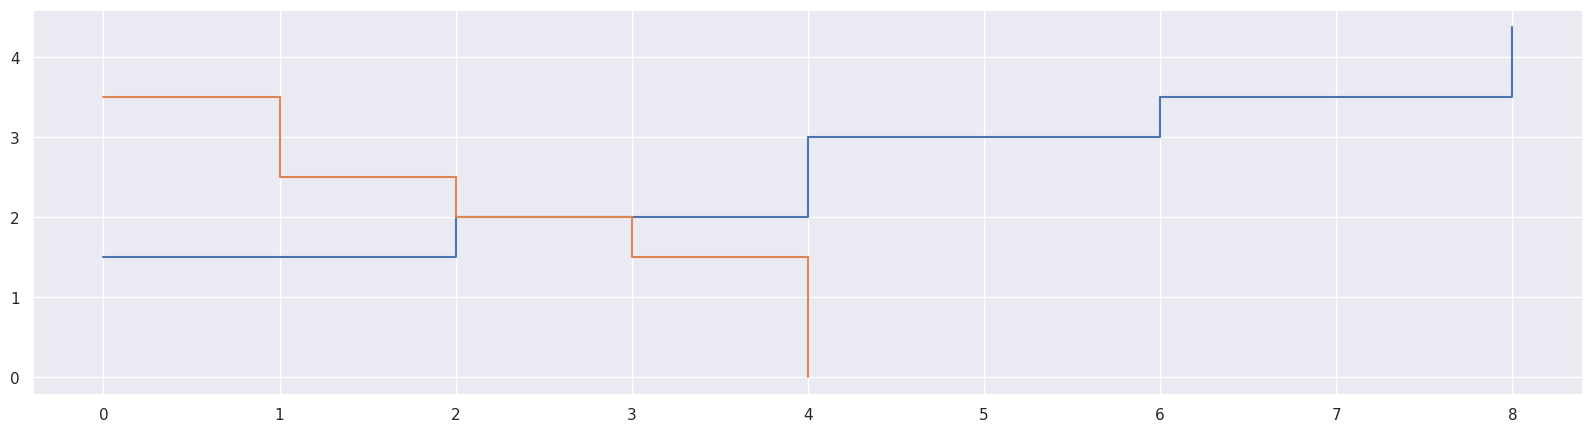

In [16]:
plt.plot(supply_curve2)
plt.plot(demand_curve1)
plt.show()

In [17]:
all_orders2 = supply_orders2 + demand_orders1
daocross_results2 = ddacropt.run_daocross_solver(all_orders2, prices)
display(daocross_results2)

DEBUG orders=[timestamp=2023-05-04 09:03:24.651799+00:00 action=sell quantity=2.0 base_token=BTC limit_price=1.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.651857+00:00 action=sell quantity=2.0 base_token=BTC limit_price=2.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.651868+00:00 action=sell quantity=2.0 base_token=BTC limit_price=3.0 quote_token=ETH deposit_address=5 wallet_address=5, timestamp=2023-05-04 09:03:24.651877+00:00 action=sell quantity=2.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=4 wallet_address=4, timestamp=2023-05-04 09:03:24.073046+00:00 action=buy quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.073102+00:00 action=buy quantity=1.0 base_token=BTC limit_price=2.5 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.073112+00:00 action=buy quantity=1.0 base_token=BTC 

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-05-04 09:03:24.651799+00:00,sell,2,BTC,1.5,ETH,2,1.0,2.0,2.0
1,2023-05-04 09:03:24.651857+00:00,sell,2,BTC,2.0,ETH,1,2.0,4.0,2.0
2,2023-05-04 09:03:24.651868+00:00,sell,2,BTC,3.0,ETH,5,0.0,0.0,NaN
3,2023-05-04 09:03:24.651877+00:00,sell,2,BTC,3.5,ETH,4,0.0,0.0,NaN
4,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2,1.0,2.0,2.0
5,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1,1.0,2.0,2.0
6,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5,1.0,2.0,2.0
7,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4,0.0,0.0,NaN


In [18]:
daoswap_results2 = ddacropt.run_daoswap_solver(all_orders2)
display(daoswap_results2)

DEBUG orders=[timestamp=2023-05-04 09:03:24.651799+00:00 action=sell quantity=2.0 base_token=BTC limit_price=1.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.651857+00:00 action=sell quantity=2.0 base_token=BTC limit_price=2.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.651868+00:00 action=sell quantity=2.0 base_token=BTC limit_price=3.0 quote_token=ETH deposit_address=5 wallet_address=5, timestamp=2023-05-04 09:03:24.651877+00:00 action=sell quantity=2.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=4 wallet_address=4, timestamp=2023-05-04 09:03:24.073046+00:00 action=buy quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.073102+00:00 action=buy quantity=1.0 base_token=BTC limit_price=2.5 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.073112+00:00 action=buy quantity=1.0 base_token=BTC 

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-05-04 09:03:24.651799+00:00,sell,2,BTC,1.5,ETH,2,0.333333,0.5,1.5
1,2023-05-04 09:03:24.651857+00:00,sell,2,BTC,2.0,ETH,1,2.000000,4.0,2.0
2,2023-05-04 09:03:24.651868+00:00,sell,2,BTC,3.0,ETH,5,1.666667,5.0,3.0
3,2023-05-04 09:03:24.651877+00:00,sell,2,BTC,3.5,ETH,4,0.000000,-0.0,NaN
4,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2,1.000000,3.5,3.5
5,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1,1.000000,2.5,2.5
6,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5,1.000000,2.0,2.0
7,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4,1.000000,1.5,1.5


## No intersection

In [19]:
limit_price_const = 3.0
supply_orders3 = ddcrsede.convert_discrete_curve_to_limit_orders(
    discrete_supply_curve,
    limit_price_const=limit_price_const,
)
supply_orders_df3 = ddacrord.convert_orders_to_dataframe(supply_orders3)
supply_orders_df3

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address
0,2023-05-04 09:03:25.163504+00:00,sell,1,BTC,4.5,ETH,2
1,2023-05-04 09:03:25.163564+00:00,sell,1,BTC,5.0,ETH,1
2,2023-05-04 09:03:25.163576+00:00,sell,1,BTC,6.0,ETH,5
3,2023-05-04 09:03:25.163585+00:00,sell,1,BTC,6.5,ETH,4


In [20]:
type_ = "supply"
supply_curve3 = ddcrsede.get_supply_demand_discrete_curve(type_, supply_orders_df3)
supply_curve3

0    4.500
1    4.500
1    5.000
2    5.000
2    6.000
3    6.000
3    6.500
4    6.500
4    8.125
Name: supply, dtype: float64

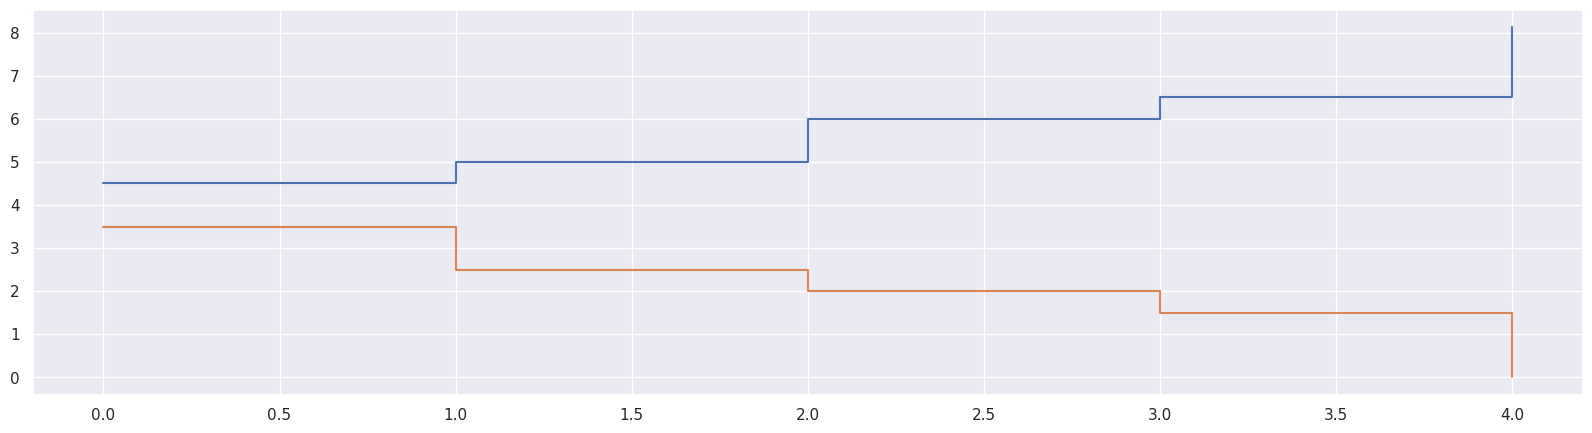

In [21]:
plt.plot(supply_curve3)
plt.plot(demand_curve1)
plt.show()

In [22]:
all_orders3 = supply_orders3 + demand_orders1
daocross_results3 = ddacropt.run_daocross_solver(all_orders3, prices)
display(daocross_results3)

DEBUG orders=[timestamp=2023-05-04 09:03:25.163504+00:00 action=sell quantity=1.0 base_token=BTC limit_price=4.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:25.163564+00:00 action=sell quantity=1.0 base_token=BTC limit_price=5.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:25.163576+00:00 action=sell quantity=1.0 base_token=BTC limit_price=6.0 quote_token=ETH deposit_address=5 wallet_address=5, timestamp=2023-05-04 09:03:25.163585+00:00 action=sell quantity=1.0 base_token=BTC limit_price=6.5 quote_token=ETH deposit_address=4 wallet_address=4, timestamp=2023-05-04 09:03:24.073046+00:00 action=buy quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.073102+00:00 action=buy quantity=1.0 base_token=BTC limit_price=2.5 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.073112+00:00 action=buy quantity=1.0 base_token=BTC 

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-05-04 09:03:25.163504+00:00,sell,1,BTC,4.5,ETH,2,0.0,0.0,NaN
1,2023-05-04 09:03:25.163564+00:00,sell,1,BTC,5.0,ETH,1,0.0,0.0,NaN
2,2023-05-04 09:03:25.163576+00:00,sell,1,BTC,6.0,ETH,5,0.0,0.0,NaN
3,2023-05-04 09:03:25.163585+00:00,sell,1,BTC,6.5,ETH,4,0.0,0.0,NaN
4,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2,0.0,0.0,NaN
5,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1,0.0,0.0,NaN
6,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5,0.0,0.0,NaN
7,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4,0.0,0.0,NaN


In [23]:
daoswap_results3 = ddacropt.run_daoswap_solver(all_orders3)
display(daoswap_results3)

DEBUG orders=[timestamp=2023-05-04 09:03:25.163504+00:00 action=sell quantity=1.0 base_token=BTC limit_price=4.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:25.163564+00:00 action=sell quantity=1.0 base_token=BTC limit_price=5.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:25.163576+00:00 action=sell quantity=1.0 base_token=BTC limit_price=6.0 quote_token=ETH deposit_address=5 wallet_address=5, timestamp=2023-05-04 09:03:25.163585+00:00 action=sell quantity=1.0 base_token=BTC limit_price=6.5 quote_token=ETH deposit_address=4 wallet_address=4, timestamp=2023-05-04 09:03:24.073046+00:00 action=buy quantity=1.0 base_token=BTC limit_price=3.5 quote_token=ETH deposit_address=2 wallet_address=2, timestamp=2023-05-04 09:03:24.073102+00:00 action=buy quantity=1.0 base_token=BTC limit_price=2.5 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-05-04 09:03:24.073112+00:00 action=buy quantity=1.0 base_token=BTC 

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-05-04 09:03:25.163504+00:00,sell,1,BTC,4.5,ETH,2,0.0,-0.0,NaN
1,2023-05-04 09:03:25.163564+00:00,sell,1,BTC,5.0,ETH,1,0.0,-0.0,NaN
2,2023-05-04 09:03:25.163576+00:00,sell,1,BTC,6.0,ETH,5,0.0,-0.0,NaN
3,2023-05-04 09:03:25.163585+00:00,sell,1,BTC,6.5,ETH,4,0.0,-0.0,NaN
4,2023-05-04 09:03:24.073046+00:00,buy,1,BTC,3.5,ETH,2,0.0,0.0,NaN
5,2023-05-04 09:03:24.073102+00:00,buy,1,BTC,2.5,ETH,1,0.0,0.0,NaN
6,2023-05-04 09:03:24.073112+00:00,buy,1,BTC,2.0,ETH,5,0.0,0.0,NaN
7,2023-05-04 09:03:24.073119+00:00,buy,1,BTC,1.5,ETH,4,0.0,0.0,NaN
